# 8. Usage of Base Functions For Advanced Plotting
This notebook provides examples on how base functions can be used to create more complex plots. The examples provided accomplish:
- Plotting both discrete and continuous data on the same figure;
- Plotting two parameters using subplots;
- Adding labels to plots;
- Highlighting certain nodes;
- Highlighting certain links;
- See <span style="color:dodgerblue"> *ALL*</span> other sections for already covered arguments

## <span style="color:dodgerblue"> Import Libraries </span>

In [1]:
import visnet.network as visinit
import visnet.drawing as visplot
import visnet.utils as visutil

import matplotlib.pyplot as plt
import os

## <span style="color:dodgerblue"> Runs Network EPANET simulation, and stores necessary information about network into a dataframe </span>

In [2]:
#Initialize model
model = visinit.initialize_model('Networks/CTown.inp')

#Define the file path for images. By default, this is the location where the python file is located.
#Because of how Jupyter Notebook works, a relative path from the notebook can not be obtained.
cwd = os.getcwd()
model['image_path'] = cwd + '/Images'

D:\Applications\Anaconda3\envs\WaterQuality\lib\site-packages\wntr\epanet\io.py:2192: UserWarning: Not all curves were used in "D:\Class Projects\wdn-viz\Examples\Networks\CTown.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


## <span style="color:dodgerblue"> 8.1 Plotting Both Discrete and Continuous Data </span>

Notes:
- Simply calling the functions using the same ax will result in both Discrete and Continuous data. 


- Note that you should set savefig = False for the first function.

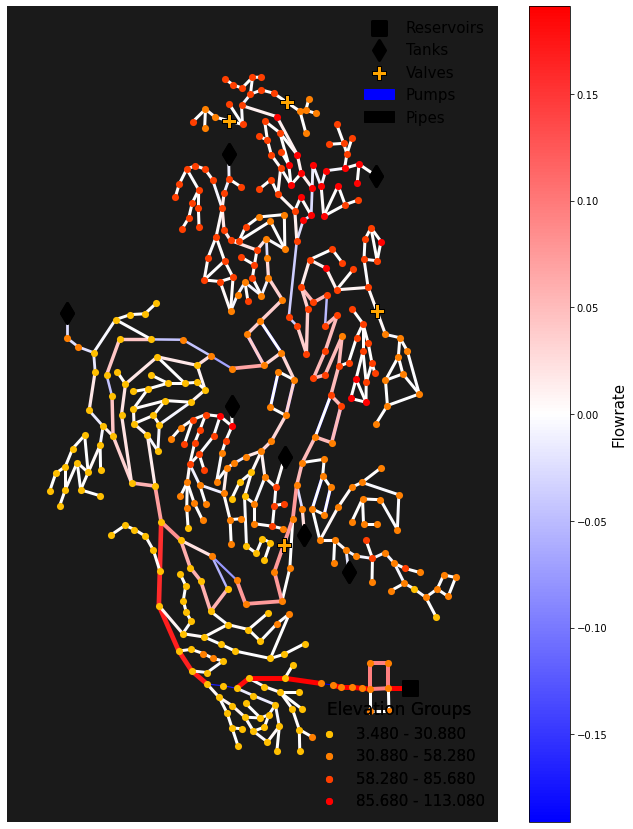

In [5]:
#Combination of distinct nodes + continuous links
fig, ax = plt.subplots(figsize=(11,15))
ax.set_facecolor((0.1, 0.1, 0.1))
#Removes border from figure
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
visplot.plot_discrete_nodes(model,ax,5,parameter='elevation',
                        savefig=False, 
                        legend_title= 'Elevation Groups')

visplot.plot_continuous_links(model,ax,parameter='flowrate',value=11,
                          pumps=False,
                          cmap='bwr',
                          color_bar_title="Flowrate", 
                          save_name="ContinuousFlowrate",
                          legend=False)
plt.show()

## <span style="color:dodgerblue"> 8.2 Plotting With Subplots </span>

Notes:
- Like the last example, calling the functions will accomplish this, so long as you define the subplots and use the appropriate ax. 


- Just as before, make sure to set savefig = False for all called functions except for the last.

['P1', 'P10', 'P100', 'P1000', 'P101', 'P1016', 'P102', 'P1022', 'P1023', 'P1024', 'P1025', 'P1026', 'P1027', 'P1028', 'P1029', 'P103', 'P1030', 'P1031', 'P1032', 'P1033', 'P1034', 'P1035', 'P1036', 'P1039', 'P104', 'P1040', 'P1041', 'P1042', 'P1044', 'P1045', 'P106', 'P107', 'P108', 'P109', 'P11', 'P110', 'P111', 'P112', 'P113', 'P115', 'P116', 'P117', 'P118', 'P119', 'P12', 'P120', 'P121', 'P122', 'P123', 'P124', 'P125', 'P126', 'P127', 'P128', 'P129', 'P13', 'P130', 'P131', 'P132', 'P134', 'P136', 'P138', 'P139', 'P14', 'P140', 'P141', 'P142', 'P144', 'P147', 'P148', 'P15', 'P150', 'P154', 'P155', 'P156', 'P157', 'P158', 'P159', 'P16', 'P160', 'P161', 'P162', 'P163', 'P165', 'P166', 'P17', 'P174', 'P177', 'P18', 'P184', 'P19', 'P195', 'P2', 'P20', 'P201', 'P21', 'P211', 'P215', 'P218', 'P219', 'P22', 'P220', 'P223', 'P225', 'P228', 'P23', 'P230', 'P231', 'P233', 'P234', 'P235', 'P237', 'P238', 'P24', 'P241', 'P242', 'P243', 'P245', 'P246', 'P248', 'P249', 'P25', 'P251', 'P252', 'P25

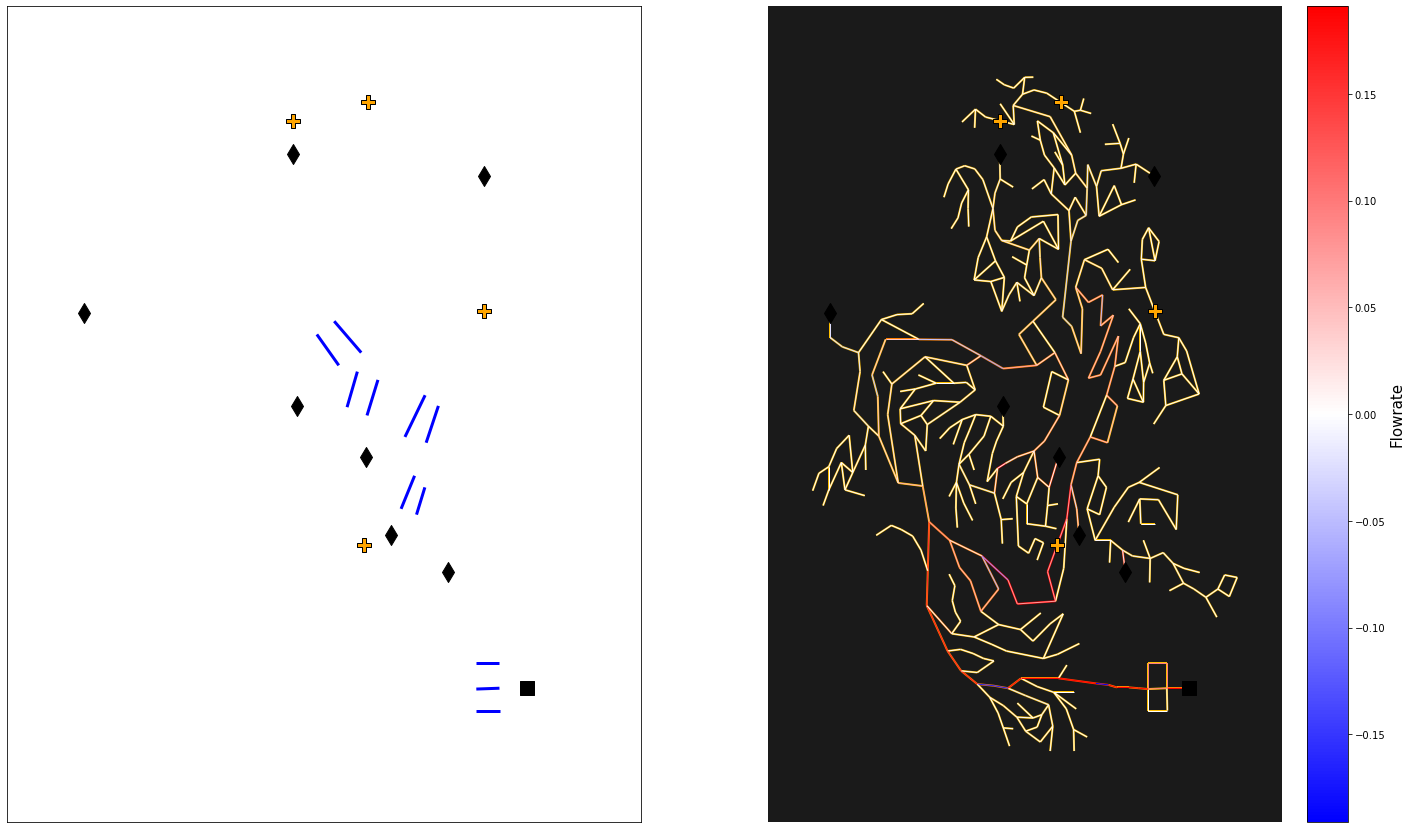

In [5]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(25,15),sharex=True,sharey=True)
ax2.set_facecolor((0.1, 0.1, 0.1))
#Removes border from figure
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
# plot 1
visplot.plot_discrete_links(model,ax1,5,parameter='velocity',
                        value=6,
                        savefig=False, 
                        legend_title= 'Elevation Groups')

# plot2
visplot.plot_continuous_links(model,ax2,parameter='flowrate',value=11,
                          pumps=False,
                          cmap='bwr',
                          color_bar_title="Flowrate", 
                          save_name="discreteContinuous")
plt.show()

## <span style="color:dodgerblue"> 8.3 Using Labels </span>

Notes:
- When using labels, ther are two modes of operation. If there is no nodelist provided, then the x and y coordinates are absolute, and can only be from 0 to 1, where (0,0) is at the bottom left, and (1,1) is at the top right.


- However, when a nodelist is provided, the coordinates become relative to that node. Because each networks coordinate system is different, some trial and error may be required to get the desired placement of the labels. However, generally working in increments of 10 is a good start.

In [ ]:
model = visinit.initialize_model('Networks/CTown.inp')

#Special Labels
fig, ax = plt.subplots(figsize=(10,15))
#Removes border from figure
plt.box(False)
#Draws distinct elevation.
visplot.plot_discrete_nodes(model,ax,5,parameter='elevation')

#Draws label without providing list of nodes. 
#This means that the coordinates provided (the first set being x and the second being y coordinates) are absolute from 0 to 1. 
visplot.draw_label(model, ax, 
               labels = ['label','label2'],
               x_coords = [0.5,0.3],
               y_coords = [0.1,0.7])

#Draws label by providing list of nodes. 
#This means that coordiantes are relative, and the value you will need to input will depend on the network.
visplot.draw_label(model, ax,
               labels = ['J511','J411'],
               x_coords = [50,-50],
               y_coords = [75,20],
               nodes = ['J511','J411'])
plt.show()

## <span style="color:dodgerblue"> 8.4 Highlighting Nodes </span>

Notes:
- By using the base function draw_nodes() a specific node or nodes can be customized and drawn on the plot. 


- The available node customization arguments are node_size, node_color, nde_shape, edge_colors, and line_widths. All of these arguments are covered in section 2. 

In [ ]:
#Special Labels
fig, ax = plt.subplots(figsize=(10,15))
#Removes border from figure
plt.box(False)
#Draws distinct elevation.
visplot.plot_discrete_nodes(model,ax,5,parameter='elevation')

#Plots red square with black outline at specific nodes
visplot.draw_nodes(model,ax,['J511','J411'],
               node_size=[50,100],
               node_color='r',
               node_shape='s',
               edge_colors='k',
               line_widths=2)
plt.show()

## <span style="color:dodgerblue"> 8.5 Highlighting Links </span>

Notes:
- By using the base function draw_links() a specific link or links can be customized and drawn on the plot. 


- The only available link customization options are the color of the links, and the width of the links. Note that the argument that controls the width of the links is an array, and that array must be equal in size to the number of links provided.

In [ ]:
#Special Labels
fig, ax = plt.subplots(figsize=(10,15))
#Removes border from figure
plt.box(False)
#Draws distinct elevation.
visplot.plot_discrete_nodes(model,ax,5,parameter='elevation')

visplot.draw_links(model,ax,['P986','P987','P988'],edge_color='g',widths=[5,5,5])
plt.show()